For each speaker, record a list of audio samples

In [1]:
import pandas as pd

speakers = pd.read_csv("2k_urls.csv", sep="\t")
speakers.head()

,id,caid
0,728505,0050H00000Bift5QAB
1,728532,0056S00000IBu8AQAT
2,728553,0056S00000H9HXEQA3
3,728555,0056S00000H9HXEQA3
4,728556,0056S00000H9HXEQA3


In [2]:
speakers_count = speakers["caid"].value_counts()
speakers_count

0056S00000ImVNZQA3    82
0056S00000Ih3mvQAB    49
0056S00000IBxRFQA1    41
0056S00000Im8p1QAB    41
0056S00000IlFBzQAN    41
                      ..
0056S00000GEFaHQAX     1
0056S00000EsPkaQAF     1
0056S00000FsJU0QAN     1
0056S00000FsuqIQAR     1
0050H00000EQB3FQAX     1
Name: caid, Length: 265, dtype: int64

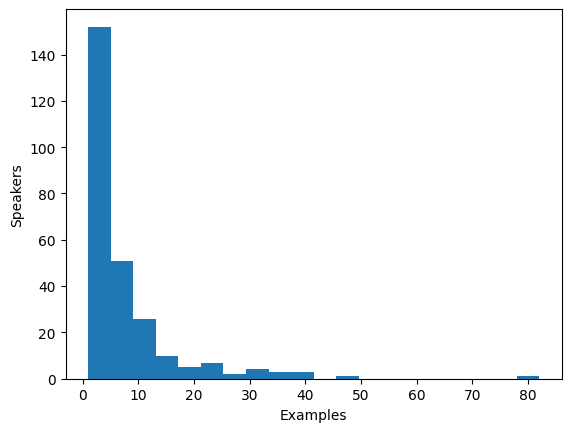

In [3]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(speakers_count.values, bins=20)
plt.ylabel("Speakers")
plt.xlabel("Examples")
plt.show()

In [4]:
# check each audio exists
import os.path as osp

for audio_id in speakers["id"]:
    _path = f"nlp_voice/{audio_id}_file.m4a" 
    if not osp.exists(_path):
        print(f"path {_path} does not exists.")

# all audios exist

In [5]:
# build a dict of list
speakers_agg = speakers.groupby('caid')['id'].apply(list).reset_index()
speakers_agg

,caid,id
0,0050H000009Ts2KQAS,[692031]
1,0050H000009TzctQAC,"[724955, 724958, 717118, 693052, 693044, 69389..."
2,0050H000009olBdQAI,[692240]
3,0050H000009uKc5QAE,"[688947, 706487, 708382, 714226, 690964]"
4,0050H000009vu9WQAQ,"[688589, 692657]"
...,...,...
260,005i0000007O96KAAS,"[694515, 695612, 697992, 697984, 692009, 69201..."
261,005i0000007sXnNAAU,[692220]
262,005i0000007sdQ0AAI,"[695348, 695327]"
263,005i0000008LxDeAAK,"[691106, 692153, 692176, 692178, 692205]"


In [6]:
# export data
import json

with open("/home/sijie/ATOM-ASR/data/xtts_v2_data/speakers.json", "w") as f:
    json.dump(speakers_agg.to_dict(orient="records"), f)